In [36]:
import sys
import re
import os
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
from datetime import datetime, date
import glob
import matplotlib.pyplot as plt


In [24]:
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)

In [14]:
# Define path to input file directory
fpath="C:\\Users\\subha.vadakkumkoor\\Documents\\Subha\\210\\Project\\CaDRReS\\input\\cv\\"

### CCLE EDA

In [18]:
# Read CCLE files 
# 4500 rows and 25 attributes. 24 drugs 
ccle_train_df = pd.DataFrame()

for file in glob.glob("C:\\Users\\subha.vadakkumkoor\\Documents\\Subha\\210\\Project\\CaDRReS\\input\\cv\\ccle*train*.csv"):
    df=pd.read_csv(file)
    ccle_train_df=ccle_train_df.append(df)
    print(df.shape, ccle_train_df.shape)

(504, 25) (504, 25)
(504, 25) (1008, 25)
(504, 25) (1512, 25)
(504, 25) (2016, 25)
(504, 25) (2520, 25)
(403, 25) (2923, 25)
(403, 25) (3326, 25)
(403, 25) (3729, 25)
(403, 25) (4132, 25)
(404, 25) (4536, 25)


In [21]:
ccle_train_df.dtypes

Unnamed: 0       object
Nutlin-3        float64
Nilotinib       float64
RAF265          float64
PHA-665752      float64
PD-0325901      float64
PLX4720         float64
PD-0332991      float64
LBW242          float64
Paclitaxel      float64
AEW541          float64
TAE684          float64
TKI258          float64
AZD0530         float64
Lapatinib       float64
PF2341066       float64
Topotecan       float64
Irinotecan      float64
17-AAG          float64
Sorafenib       float64
L-685458        float64
AZD6244         float64
ZD-6474         float64
Panobinostat    float64
Erlotinib       float64
dtype: object

In [25]:
ccle_train_df.head()

,Unnamed: 0,Nutlin-3,Nilotinib,RAF265,PHA-665752,PD-0325901,PLX4720,PD-0332991,LBW242,Paclitaxel,AEW541,TAE684,TKI258,AZD0530,Lapatinib,PF2341066,Topotecan,Irinotecan,17-AAG,Sorafenib,L-685458,AZD6244,ZD-6474,Panobinostat,Erlotinib
0,MEG01_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,6.765109,-3.839066,0.402453,4.256824,-1.934012,4.743949,4.474961,NaN,-3.232088,3.488302,4.831909,1.593487,NaN,3.291342,1.318764,-0.955290,-0.793323,NaN,4.589818,6.405393,0.918395,0.713241,-3.980942,NaN
1,PC3_PROSTATE,8.598242,NaN,2.965691,8.239537,8.251771,3.760445,8.797610,5.120933,-4.915459,NaN,2.786075,NaN,1.924611,NaN,3.370327,NaN,-1.272219,NaN,3.937301,5.478558,7.591123,2.326224,-3.132998,4.891060
2,SW900_LUNG,7.932759,5.160422,3.362988,5.756970,2.717972,NaN,NaN,4.843282,NaN,4.220448,6.747243,8.489978,NaN,4.184082,NaN,2.022449,NaN,-0.781268,7.851606,NaN,7.864354,NaN,0.155310,6.683072
3,NCIH2030_LUNG,7.498210,3.335135,-0.095186,6.288269,3.123807,3.839061,4.190073,5.870547,-5.156032,2.591927,2.738866,2.155947,0.808402,1.919461,3.167376,-2.718614,-0.711661,-4.102564,2.806899,5.462880,6.796578,NaN,-2.600897,NaN
4,PK59_PANCREAS,NaN,3.241911,1.173380,5.191902,-0.811337,4.180269,3.683001,NaN,NaN,2.675324,NaN,3.696197,2.939160,2.769853,NaN,0.201275,0.471099,-2.250021,3.225314,3.624047,NaN,5.181609,-2.893220,4.393829


In [28]:
ccle_train_df.info() - some have more nulls than others

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4536 entries, 0 to 403
Data columns (total 25 columns):
Unnamed: 0      4536 non-null object
Nutlin-3        4032 non-null float64
Nilotinib       3360 non-null float64
RAF265          3680 non-null float64
PHA-665752      4024 non-null float64
PD-0325901      4032 non-null float64
PLX4720         3968 non-null float64
PD-0332991      3472 non-null float64
LBW242          4024 non-null float64
Paclitaxel      4024 non-null float64
AEW541          4024 non-null float64
TAE684          4032 non-null float64
TKI258          4032 non-null float64
AZD0530         4032 non-null float64
Lapatinib       4032 non-null float64
PF2341066       4032 non-null float64
Topotecan       4032 non-null float64
Irinotecan      2536 non-null float64
17-AAG          4024 non-null float64
Sorafenib       4024 non-null float64
L-685458        3928 non-null float64
AZD6244         4024 non-null float64
ZD-6474         3968 non-null float64
Panobinostat    4000 

In [27]:
ccle_train_df.describe()

,Nutlin-3,Nilotinib,RAF265,PHA-665752,PD-0325901,PLX4720,PD-0332991,LBW242,Paclitaxel,AEW541,TAE684,TKI258,AZD0530,Lapatinib,PF2341066,Topotecan,Irinotecan,17-AAG,Sorafenib,L-685458,AZD6244,ZD-6474,Panobinostat,Erlotinib
count,4032.000000,3360.000000,3680.000000,4024.000000,4032.000000,3968.000000,3472.000000,4024.000000,4024.000000,4024.000000,4032.000000,4032.000000,4032.000000,4032.000000,4032.000000,4032.000000,2536.000000,4024.000000,4024.000000,3928.000000,4024.000000,3968.000000,4000.000000,4024.000000
mean,5.859906,4.063362,1.733612,4.801625,1.863106,5.255693,4.518539,5.278463,-5.520692,3.026198,2.333291,3.178050,3.870720,4.110920,3.770495,-0.814033,-1.483072,-1.796944,5.139789,5.283442,3.706926,3.527904,-3.973175,4.416515
std,2.106981,2.209418,1.666032,2.236145,3.733464,2.529058,2.204789,2.230430,3.207176,1.797724,2.187182,1.894730,2.382896,2.338261,2.177338,2.415687,1.883777,2.140887,2.550530,2.297753,3.220863,2.163737,1.257730,2.290466
min,0.673403,-8.408862,-3.506970,-0.187384,-9.938644,-4.534139,-0.657193,-4.670677,-11.595720,-1.953771,-6.303683,-4.810616,-3.004705,-3.724235,-4.707175,-6.875759,-5.902564,-7.764250,-6.499268,-1.389877,-7.280191,-3.274749,-8.628952,-4.185429
25%,4.408471,2.879637,0.641351,3.210815,-0.261273,3.614379,3.044231,4.178092,-7.681300,2.005179,1.163533,2.118311,2.396536,2.825976,2.599690,-2.456385,-2.811831,-3.230830,3.051222,3.407788,1.802880,2.241773,-4.681855,3.164121
50%,5.730023,3.629930,1.850021,4.400929,2.552482,5.057630,4.316562,5.213767,-6.336202,2.904082,2.119828,2.924656,3.581001,3.779489,3.319998,-0.855919,-1.549337,-1.975627,4.495772,5.178459,4.092013,3.357036,-3.907838,4.239307
75%,7.087690,5.220634,2.730052,6.210410,4.415028,6.808052,5.671644,6.409076,-4.412756,3.779576,3.111060,3.850243,5.222622,5.413961,4.292128,0.802819,-0.014257,-0.367712,7.078689,6.942833,5.740402,4.516718,-3.125984,5.605369
max,19.192181,10.695560,11.125693,18.503210,13.071849,14.878953,12.178718,15.539742,6.098186,12.828843,14.863143,13.012340,14.667459,17.527454,18.150738,9.883405,2.865086,7.948623,12.233900,11.415126,15.988760,14.399131,0.155310,12.568083


In [29]:
#Each cell line has 9 rows
ccle_train_df['Unnamed: 0'].value_counts()

NCIH1793_LUNG                                     9
ZR751_BREAST                                      9
SW1271_LUNG                                       9
AN3CA_ENDOMETRIUM                                 9
NCIH2122_LUNG                                     9
A549_LUNG                                         9
HS936T_SKIN                                       9
A2058_SKIN                                        9
PL45_PANCREAS                                     9
RT4_URINARY_TRACT                                 9
NCIH747_LARGE_INTESTINE                           9
HLF_LIVER                                         9
JHH6_LIVER                                        9
KELLY_AUTONOMIC_GANGLIA                           9
CAKI2_KIDNEY                                      9
NCIH3255_LUNG                                     9
HCC2935_LUNG                                      9
C3A_LIVER                                         9
MIAPACA2_PANCREAS                                 9
HLE_LIVER   

In [31]:
ccle_train_df=ccle_train_df.rename(columns={'Unnamed: 0':"Cell_line"})

In [32]:
#Not quite sure what thiese lines mean
ccle_train_df[ccle_train_df['Cell_line']=="NCIH1793_LUNG"]

,Cell_line,Nutlin-3,Nilotinib,RAF265,PHA-665752,PD-0325901,PLX4720,PD-0332991,LBW242,Paclitaxel,AEW541,TAE684,TKI258,AZD0530,Lapatinib,PF2341066,Topotecan,Irinotecan,17-AAG,Sorafenib,L-685458,AZD6244,ZD-6474,Panobinostat,Erlotinib
131,NCIH1793_LUNG,3.805246,NaN,1.635277,8.55341,NaN,7.434646,1.81521,NaN,-5.818646,NaN,3.09257,3.923591,1.96921,3.5084,8.871376,0.669776,NaN,0.40234,9.26491,NaN,2.838584,0.979714,NaN,3.300404
131,NCIH1793_LUNG,3.805246,4.869615,1.635277,8.55341,2.164929,7.434646,1.81521,5.798127,-5.818646,2.739192,3.09257,NaN,1.96921,NaN,NaN,0.669776,NaN,0.40234,9.26491,6.81757,2.838584,NaN,NaN,NaN
131,NCIH1793_LUNG,NaN,4.869615,1.635277,8.55341,2.164929,NaN,1.81521,5.798127,NaN,2.739192,3.09257,3.923591,NaN,3.5084,8.871376,0.669776,NaN,NaN,9.26491,6.81757,2.838584,0.979714,NaN,3.300404
131,NCIH1793_LUNG,3.805246,4.869615,1.635277,NaN,2.164929,7.434646,NaN,5.798127,-5.818646,2.739192,3.09257,3.923591,1.96921,3.5084,8.871376,NaN,NaN,0.40234,NaN,6.81757,NaN,0.979714,NaN,3.300404
131,NCIH1793_LUNG,3.805246,4.869615,NaN,8.55341,2.164929,7.434646,1.81521,5.798127,-5.818646,2.739192,NaN,3.923591,1.96921,3.5084,8.871376,0.669776,NaN,0.40234,9.26491,6.81757,2.838584,0.979714,NaN,3.300404
107,NCIH1793_LUNG,3.805246,4.869615,1.635277,8.55341,2.164929,7.434646,1.81521,5.798127,-5.818646,2.739192,3.09257,3.923591,1.96921,3.5084,8.871376,0.669776,NaN,0.40234,9.26491,6.81757,2.838584,0.979714,NaN,3.300404
104,NCIH1793_LUNG,3.805246,4.869615,1.635277,8.55341,2.164929,7.434646,1.81521,5.798127,-5.818646,2.739192,3.09257,3.923591,1.96921,3.5084,8.871376,0.669776,NaN,0.40234,9.26491,6.81757,2.838584,0.979714,NaN,3.300404
104,NCIH1793_LUNG,3.805246,4.869615,1.635277,8.55341,2.164929,7.434646,1.81521,5.798127,-5.818646,2.739192,3.09257,3.923591,1.96921,3.5084,8.871376,0.669776,NaN,0.40234,9.26491,6.81757,2.838584,0.979714,NaN,3.300404
104,NCIH1793_LUNG,3.805246,4.869615,1.635277,8.55341,2.164929,7.434646,1.81521,5.798127,-5.818646,2.739192,3.09257,3.923591,1.96921,3.5084,8.871376,0.669776,NaN,0.40234,9.26491,6.81757,2.838584,0.979714,NaN,3.300404


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AC59A53240>,
      dtype=object)

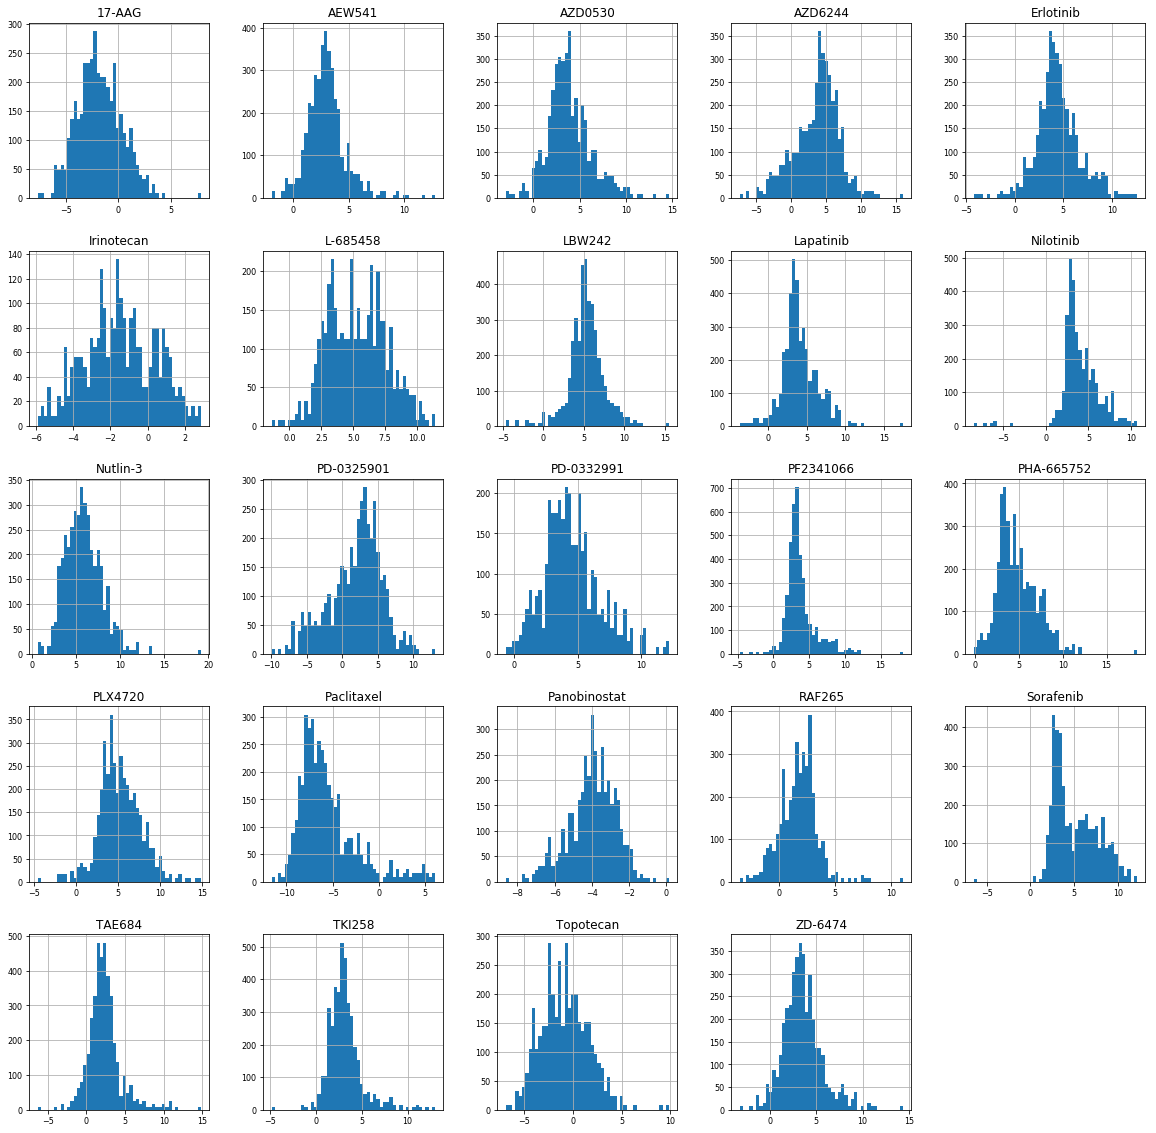

In [42]:
ccle_train_df.hist(figsize=(20, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [ ]:
# What are these numbers
# Dep var : identity matrix?

###  GDSC EDA

In [20]:
# 4500 rows and 266 attributes
gdsc_train_df = pd.DataFrame()

for file in glob.glob("C:\\Users\\subha.vadakkumkoor\\Documents\\Subha\\210\\Project\\CaDRReS\\input\\cv\\gdsc*train*.csv"):
    df=pd.read_csv(file)
    gdsc_train_df=gdsc_train_df.append(df)
    print(df.shape, gdsc_train_df.shape)

(859, 266) (859, 266)
(859, 266) (1718, 266)
(859, 266) (2577, 266)
(859, 266) (3436, 266)
(860, 266) (4296, 266)


In [33]:
gdsc_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4296 entries, 0 to 859
Columns: 266 entries, Unnamed: 0 to 1023
dtypes: float64(265), int64(1)
memory usage: 8.8 MB


In [26]:
gdsc_train_df.head()

,Unnamed: 0,1024,1025,1026,3,1028,1029,1030,1031,1032,1033,11,1036,1037,1038,1039,34,17,1042,1043,1046,1047,1049,1050,175,1052,1053,1054,5,32,1057,1058,1059,1060,1061,1062,291,1066,1067,1069,1072,179,52,53,54,9,56,59,60,62,63,64,1091,71,83,86,87,88,89,1114,91,37,94,293,104,1129,106,1133,110,111,1142,1143,55,38,1149,127,45,133,134,135,136,1161,1164,194,1166,1170,147,150,1175,152,153,154,155,156,157,158,159,163,164,165,166,167,1192,1194,171,172,173,1199,176,177,178,1203,180,1,182,184,185,186,190,192,193,1218,1219,196,197,199,200,201,202,203,204,205,1230,207,208,211,1236,206,1239,1241,1242,1243,221,222,223,1248,225,226,228,229,230,231,1259,1261,1262,1264,1268,245,41,1021,249,252,253,254,255,256,257,258,260,261,262,263,265,266,268,269,271,272,273,274,275,276,277,279,281,282,283,286,287,288,290,219,292,1158,294,295,298,299,300,301,302,303,304,305,306,51,308,309,310,312,35,224,326,328,140,330,331,332,333,1017,341,344,345,346,1371,1372,1373,1375,1377,1378,29,235,30,151,238,6,329,1014,1015,1494,1495,1498,1502,119,1001,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1526,1527,1016,1529,1018,1019,1020,170,1022,1023
0,1240121,-0.118994,NaN,-3.907545,NaN,4.382521,9.272281,5.432403,-7.196907,-0.883702,5.790930,NaN,3.367587,0.197788,3.991698,10.095813,NaN,NaN,6.480256,7.621959,NaN,6.179104,8.764957,0.805098,9.842637,1.947245,1.415062,2.415022,NaN,NaN,-4.832570,-0.397116,-1.301373,-4.025988,7.978961,6.798357,9.817248,3.543242,8.054341,7.782252,9.071028,6.010170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.335916,NaN,NaN,NaN,NaN,NaN,NaN,10.435586,NaN,NaN,NaN,-1.305043,NaN,5.816893,NaN,2.080822,NaN,NaN,NaN,NaN,NaN,NaN,-2.070232,NaN,NaN,-0.425100,4.868281,-1.290940,-0.546959,NaN,NaN,-4.294259,NaN,3.370056,10.823676,9.479953,4.241201,9.407157,8.108735,8.918755,7.514238,1.162083,0.147879,6.602900,3.019172,6.528947,9.304187,8.528317,7.059610,3.429936,2.959566,10.702403,4.755015,3.424281,1.578394,4.709383,12.333229,12.170237,10.915675,NaN,-5.229111,NaN,0.185298,7.956121,9.416580,3.440303,-2.286906,5.710689,10.311563,1.549880,3.685358,4.250317,5.628889,8.482256,-1.749546,-6.079243,6.432581,10.842193,3.255462,8.909834,5.639417,4.066821,8.792923,10.069907,4.959434,10.338402,1.981106,5.825994,1.766703,2.817392,8.309376,5.533760,1.274934,-1.259485,10.512847,7.851297,6.057553,9.937600,9.746460,11.181323,1.976417,2.958071,8.282979,7.363681,3.478831,11.177641,NaN,1.977275,3.392675,0.027832,9.988998,5.374606,7.606881,8.269232,5.891820,10.610155,9.370249,9.936180,11.206150,10.017610,6.466097,11.141685,NaN,11.708492,9.635125,0.165429,-0.817560,0.744701,11.511858,2.889859,7.611751,10.668770,8.286077,8.308253,-7.015690,11.828712,4.304932,7.643217,11.249046,0.246840,10.586455,NaN,7.438702,9.303579,12.124664,9.263570,11.471832,3.186313,-0.095938,6.583279,11.768540,8.236962,3.102524,NaN,0.684847,9.675384,10.013864,5.087102,NaN,-0.319119,8.266746,-0.993348,-2.892600,7.969234,3.825990,10.771443,9.460388,3.688378,9.710991,8.210575,9.834096,-3.272108,5.100667,-4.472870,5.359021,5.583526,3.796381,0.718474,NaN,5.484332,NaN,11.414197,8.469278,NaN,8.939053,-0.405106,1.015704,-6.784691,4.078266,0.297679,6.442397,NaN,8.922340,-9.065271,-8.301324,1.998429,-2.455685,-11.688212,4.329096,9.033478,-0.035476,0.609666,-0.284453,3.423751,0.706309,0.705568,-6.007790,-1.064632,7.342955,-0.137528,4.859275,1.426957,-0.742743,3.144137
1,1240124,2.329470,10.575640,-2.382794,NaN,11.213035,11.189297,14.795448,11.437178,0.099986,10.920727,NaN,12.027047,3.484652,11.020559,12.081377,NaN,NaN,13.779035,14.670218,11.171651,10.863031,11.480293,10.132625,NaN,11.590866,4.139419,3.603038,NaN,NaN,0.664589,0.716612,1.550950,-2.150380,10.978190,12.820346,NaN,5.746184,12.130508,6.867155,5.767606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.638018,NaN,NaN,NaN,NaN,NaN,NaN,10.408530,NaN,NaN,NaN,NaN,NaN,11.680946,NaN,6.116620,NaN,NaN,NaN,NaN,NaN,NaN,2.833917,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.416962,NaN,NaN,10.156347,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.428327,11.724346,NaN,Na

In [43]:
gdsc_train_df=gdsc_train_df.rename(columns={'Unnamed: 0':"Some_Key"})

In [44]:
gdsc_train_df.describe()

,Some_Key,1024,1025,1026,3,1028,1029,1030,1031,1032,1033,11,1036,1037,1038,1039,34,17,1042,1043,1046,1047,1049,1050,175,1052,1053,1054,5,32,1057,1058,1059,1060,1061,1062,291,1066,1067,1069,1072,179,52,53,54,9,56,59,60,62,63,64,1091,71,83,86,87,88,89,1114,91,37,94,293,104,1129,106,1133,110,111,1142,1143,55,38,1149,127,45,133,134,135,136,1161,1164,194,1166,1170,147,150,1175,152,153,154,155,156,157,158,159,163,164,165,166,167,1192,1194,171,172,173,1199,176,177,178,1203,180,1,182,184,185,186,190,192,193,1218,1219,196,197,199,200,201,202,203,204,205,1230,207,208,211,1236,206,1239,1241,1242,1243,221,222,223,1248,225,226,228,229,230,231,1259,1261,1262,1264,1268,245,41,1021,249,252,253,254,255,256,257,258,260,261,262,263,265,266,268,269,271,272,273,274,275,276,277,279,281,282,283,286,287,288,290,219,292,1158,294,295,298,299,300,301,302,303,304,305,306,51,308,309,310,312,35,224,326,328,140,330,331,332,333,1017,341,344,345,346,1371,1372,1373,1375,1377,1378,29,235,30,151,238,6,329,1014,1015,1494,1495,1498,1502,119,1001,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1526,1527,1016,1529,1018,1019,1020,170,1022,1023
count,4.296000e+03,3560.000000,3140.000000,3552.000000,1556.000000,3556.000000,3544.000000,3548.000000,3560.000000,3564.000000,3572.000000,1708.000000,3544.000000,3552.000000,3540.000000,3484.000000,1744.000000,1688.000000,3504.000000,3540.000000,3184.000000,3548.000000,3548.000000,3340.000000,3676.000000,3548.000000,3452.000000,3452.000000,1704.000000,1684.000000,3520.000000,3520.000000,3516.000000,3516.000000,3468.000000,3444.000000,3912.000000,3764.000000,3848.000000,3856.000000,3868.000000,3884.000000,1696.000000,1704.000000,1704.000000,1708.000000,1696.000000,1704.000000,1700.000000,1704.000000,1708.000000,1704.000000,3856.000000,1716.000000,1644.000000,1704.000000,1708.000000,1712.000000,1716.000000,3612.000000,1716.000000,1736.000000,1708.000000,3892.000000,1708.000000,3800.000000,1692.000000,3844.000000,1688.000000,1696.000000,2076.000000,2072.000000,1708.000000,1744.000000,3852.000000,1720.000000,1704.000000,3724.000000,3760.000000,3704.000000,3728.000000,2076.000000,2080.000000,3684.000000,2084.000000,3756.000000,3744.000000,3720.000000,3856.000000,3932.000000,3764.000000,3752.000000,3760.000000,3744.000000,3760.000000,3684.000000,3744.000000,3760.000000,3736.000000,3748.000000,3760.000000,3720.000000,3864.000000,3864.000000,3748.000000,3728.000000,3712.000000,3864.000000,3720.000000,3688.000000,3712.000000,1976.000000,3656.000000,1572.000000,3692.000000,3708.000000,3708.000000,3676.000000,3692.000000,3720.000000,3920.000000,3800.000000,3876.000000,3876.000000,3704.000000,3712.000000,3728.000000,3724.000000,3724.000000,3932.000000,3712.000000,3920.000000,3868.000000,3712.000000,3928.000000,3932.000000,3876.000000,3928.000000,3284.000000,3800.000000,3804.000000,3860.000000,3932.000000,3924.000000,3928.000000,3740.000000,3932.000000,3808.000000,3928.000000,3924.000000,3932.000000,3356.000000,3808.000000,3828.000000,3780.000000,3776.000000,3824.000000,3888.000000,1700.000000,3544.000000,3912.000000,3916.000000,3920.000000,3916.000000,3920.000000,3920.000000,3912.000000,3900.000000,3908.000000,3912.000000,3908.000000,3912.000000,3896.000000,3908.000000,3780.000000,3884.000000,3896.000000,3872.000000,3840.000000,3804.000000,3900.000000,3884.000000,3920.000000,3912.000000,3908.000000,3916.000000,3920.000000,3912.000000,3908.000000,3912.000000,3908.000000,3916.000000,3916.000000,2076.000000,3904.000000,3912.000000,3916.000000,3896.000000,3896.000000,3920.000000,3876.000000,3912.000000,3908.000000,3912.000000,3916.000000,1692.000000,3900.000000,3912.000000,3912.000000,3912.000000,1736.000000,3912.000000,3912.000000,3880.000000,3764.000000,3916.000000,3864.000000,3920.000000,3888.000000,3564.000000,3896.000000,3900.000000,3912.000000,3840.000000,3820.000000,3720.000000,3612.000000,3776.000000,3808.000000,3892.000000,1716.000000,3920.000000,1724.000000,3724.000000,3928.000000,1740.000000,3920.000000,3512.000000,3516.0000

In [45]:
#Something is repeating here 4 times each
gdsc_train_df['Some_Key'].value_counts()

753624     4
909255     4
905967     4
905963     4
905959     4
905955     4
905951     4
905947     4
905943     4
905939     4
905935     4
1524417    4
1327773    4
1290907    4
1327769    4
1327765    4
1299075    4
905975     4
1299067    4
717431     4
1299059    4
1299051    4
924250     4
924246     4
924242     4
909905     4
924238     4
1290807    4
1290795    4
924186     4
907798     4
1290771    4
905971     4
905979     4
1298361    4
1659819    4
1240140    4
1240136    4
1240132    4
910401     4
1240128    4
1240124    4
1297440    4
753559     4
949178     4
949174     4
949170     4
949092     4
1659823    4
949166     4
949162     4
905983     4
949158     4
949154     4
910209     4
908158     4
908150     4
908146     4
908142     4
908138     4
908134     4
908130     4
908126     4
908122     4
908118     4
905991     4
907794     4
1290767    4
907790     4
684059     4
946355     4
749715     4
749711     4
1503371    4
1503367    4
1503363    4
909780     4

In [46]:
#Some repetitions here
gdsc_train_df[gdsc_train_df['Some_Key']==906852]

,Some_Key,1024,1025,1026,3,1028,1029,1030,1031,1032,1033,11,1036,1037,1038,1039,34,17,1042,1043,1046,1047,1049,1050,175,1052,1053,1054,5,32,1057,1058,1059,1060,1061,1062,291,1066,1067,1069,1072,179,52,53,54,9,56,59,60,62,63,64,1091,71,83,86,87,88,89,1114,91,37,94,293,104,1129,106,1133,110,111,1142,1143,55,38,1149,127,45,133,134,135,136,1161,1164,194,1166,1170,147,150,1175,152,153,154,155,156,157,158,159,163,164,165,166,167,1192,1194,171,172,173,1199,176,177,178,1203,180,1,182,184,185,186,190,192,193,1218,1219,196,197,199,200,201,202,203,204,205,1230,207,208,211,1236,206,1239,1241,1242,1243,221,222,223,1248,225,226,228,229,230,231,1259,1261,1262,1264,1268,245,41,1021,249,252,253,254,255,256,257,258,260,261,262,263,265,266,268,269,271,272,273,274,275,276,277,279,281,282,283,286,287,288,290,219,292,1158,294,295,298,299,300,301,302,303,304,305,306,51,308,309,310,312,35,224,326,328,140,330,331,332,333,1017,341,344,345,346,1371,1372,1373,1375,1377,1378,29,235,30,151,238,6,329,1014,1015,1494,1495,1498,1502,119,1001,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1526,1527,1016,1529,1018,1019,1020,170,1022,1023
505,906852,0.06517,6.143414,-3.312664,NaN,4.657471,6.460827,4.676845,-7.010914,-4.280089,6.750924,NaN,4.331996,2.889483,1.305749,5.68975,NaN,NaN,9.981567,9.110347,1.260555,8.001891,2.739271,2.864724,1.130098,3.405366,2.471418,1.019615,NaN,NaN,-5.377464,2.904479,-0.693881,-2.606637,7.821571,1.564006,3.871323,2.544282,6.150528,4.175601,5.502171,2.676828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.351303,NaN,NaN,NaN,NaN,NaN,NaN,10.99394,NaN,NaN,NaN,9.031338,NaN,4.585157,NaN,3.362844,NaN,NaN,NaN,NaN,NaN,NaN,-3.117766,NaN,NaN,-3.327118,1.811815,-6.102936,0.212814,NaN,NaN,-6.47158,NaN,2.128465,8.16855,6.341613,4.081448,3.398911,-1.276332,7.340678,-1.223831,2.565261,-1.671291,1.161577,-0.582947,-1.091996,0.670468,9.079013,5.717993,2.178315,-0.346065,7.57467,5.41059,3.80587,2.007994,4.846218,3.465122,3.992717,0.933633,NaN,-5.354022,NaN,-1.751104,2.489804,7.404554,3.929786,0.118101,7.753449,8.356095,5.791119,5.48285,11.307559,3.570293,4.340302,-5.983364,-9.13125,6.917012,3.546744,-0.633983,9.477075,7.173164,2.258081,-0.986553,8.806889,3.848968,7.804323,3.015162,3.443457,2.188893,2.858396,5.214432,5.483008,2.3955,-1.772496,3.513806,6.351118,5.520922,3.80091,7.123972,7.262099,6.214222,0.509169,7.148988,6.884011,7.713757,3.81516,NaN,5.985366,3.86504,-0.818068,7.71573,6.014426,4.186425,1.320687,6.436487,7.17393,4.350297,6.632069,3.372236,5.273718,4.697861,8.262244,-6.974,4.500692,6.461405,-1.005926,-1.73418,-0.805222,7.630087,-0.119426,3.777822,6.34593,7.183677,5.868728,-4.762229,7.626871,4.332295,5.936979,5.775427,2.093223,3.901467,NaN,3.847407,4.272075,7.553348,1.912616,5.233223,3.07447,0.863814,4.37858,5.394642,5.803641,4.06452,NaN,-0.00468,4.470898,4.898494,3.769316,NaN,4.366498,2.873334,0.709037,-7.355325,5.079256,1.815783,8.341112,8.73538,5.585636,8.106359,3.06744,8.507311,-0.690402,4.595201,-1.774201,3.594807,8.010667,4.651917,4.911368,NaN,2.187464,NaN,4.133432,6.249023,NaN,5.652323,-0.172726,2.015694,-4.027838,4.813555,3.612315,4.994512,NaN,10.354773,-3.682924,-6.998027,3.344167,0.771058,-9.505889,-0.656453,7.899254,-1.289056,4.785879,0.432176,5.24651,2.088703,-0.018965,-4.713799,7.602509,8.342263,0.545234,6.963193,-1.603721,-1.191327,3.796616
491,906852,0.06517,6.143414,-3.312664,NaN,4.657471,6.460827,4.676845,-7.010914,-4.280089,6.750924,NaN,4.331996,2.889483,1.305749,5.68975,NaN,NaN,9.981567,9.110347,1.260555,8.001891,2.739271,2.864724,1.130098,3.405366,2.471418,1.019615,NaN,NaN,-5.377464,2.904479,-0.693881,-2.606637,7.821571,1.564006,3.871323,2.544282,6.150528,4.175601,5.502171,2.676828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.351303,NaN,NaN,NaN,NaN,NaN,NaN,10.99394,NaN,NaN,NaN,9.031338,NaN,4.585157,NaN,3.362844,NaN,NaN,NaN,NaN,NaN,NaN,-3.117766,NaN,NaN,-3.327118,1.811815,-6.102936,0.212814,NaN,NaN,-6.47158,NaN,2.128465,8.16855,6.341613,4.081448,3.398911,-1.276332,7.340678,-1.223831,2.565261,-1.671291,1.161577,-0.582947,-1

In [47]:
#They are exact duplicates
gdsc_train_df[gdsc_train_df['Some_Key']==906852].drop_duplicates().shape

(1, 266)

In [49]:
#New size+ 1074
gdsc_train_df_nodup=gdsc_train_df.drop_duplicates()
gdsc_train_df_nodup.shape

(1074, 266)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AC570F5940>,
      dtype=object)

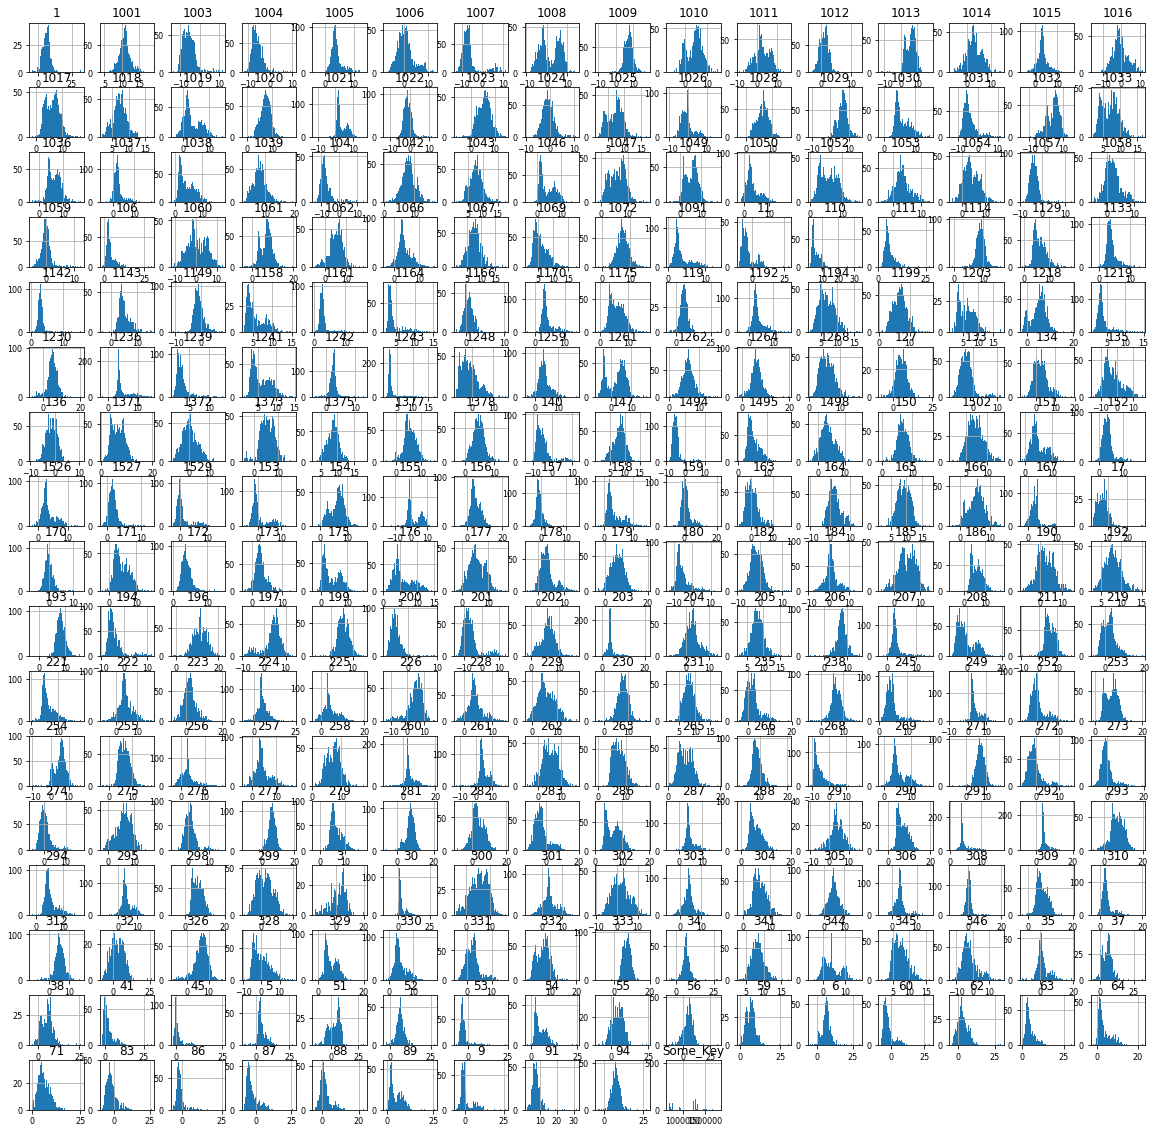

In [50]:
gdsc_train_df_nodup.hist(figsize=(20, 20), bins=50, xlabelsize=8, ylabelsize=8)